## Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

membaca data iris dan menampilkan 5 baris teratas

In [3]:
df = pd.read_csv("../data iris.csv",delimiter=";")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


membaca banyaknya jumlah baris dan kolom nya(baris: 150, kolom:5)

In [4]:
df.shape

(150, 5)

Untuk mengecek adanya data yang kosong atau tidak

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

mengecek banyaknya data untuk masing masing class

In [6]:
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

membuat variabel X untuk fitur dan y untuk class

In [7]:
X = df.drop('class',axis=1)
y = df['class']

membagi data sebanyak 30% untuk data test

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [10]:
# check data types in X_train

X_train.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

membuat model Random Forest

In [20]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the model

rfc = RandomForestClassifier(random_state=0)
# rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model

rfc.fit(X_train, y_train)

# Predict the Test set results

y_pred = rfc.predict(X_test)

# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model akurasi score dengan 10 decision tree : {0:0.2f}'. format(accuracy_score(y_test, y_pred)))

Model akurasi score dengan 10 decision tree : 1.00


In [21]:
y_pred_train = rfc.predict(X_train)
print('Training set accuracy score: {0:0.2f}'. format(accuracy_score(y_train, y_pred_train)))

Training set accuracy score: 1.00


In [15]:
# print the scores on training and test set

print('Training set score: {:.2f}'.format(rfc.score(X_train, y_train)))

print('Test set score: {:.2f}'.format(rfc.score(X_test, y_test)))

Training set score: 1.00
Test set score: 1.00


visualisasi confusion matrix

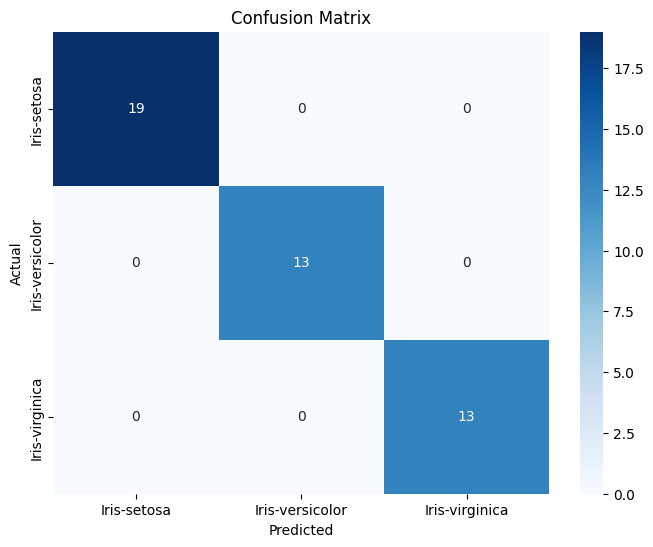

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=df['class'].unique(), yticklabels=df['class'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

menampilkan akurasi menggunakan classification report

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print(classification_report(y_train, y_pred_train))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        31
Iris-versicolor       1.00      1.00      1.00        37
 Iris-virginica       1.00      1.00      1.00        37

       accuracy                           1.00       105
      macro avg       1.00      1.00      1.00       105
   weighted avg       1.00      1.00      1.00       105

